# K-Nearest Neighbor(KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
glass = pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/13.KNN/glass.csv")
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [3]:
glass.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

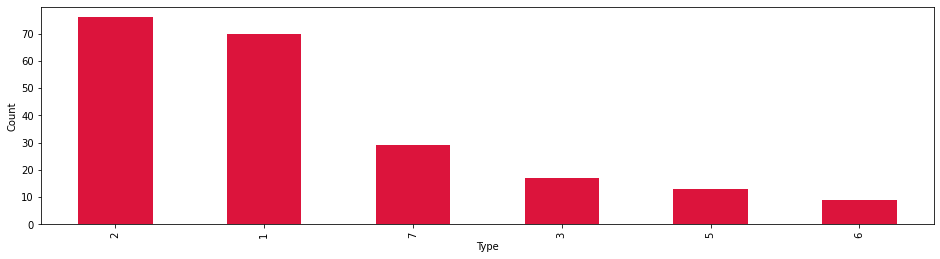

In [6]:
plt.figure(figsize=(16,4))
glass.Type.value_counts().plot(kind="bar",color="crimson")
plt.xlabel("Type")
plt.ylabel("Count")
plt.plot();

In [7]:
scaler = StandardScaler()
scaler.fit(glass.drop("Type",axis=1))
scaled_features = scaler.transform(glass.drop("Type",axis=1))
glass_t = pd.DataFrame(scaled_features,columns = glass.columns[:-1])

In [8]:
X = glass_t
Y = glass["Type"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=7)

In [9]:
model = KNeighborsClassifier(n_neighbors=5, metric = "minkowski" , p = 2) 
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(round(result*100,2),"%")

67.61 %


In [10]:
kfold = KFold(n_splits=10)
model1 = KNeighborsClassifier(n_neighbors=3, metric = "minkowski" , p = 2) 
model1.fit(X_train, Y_train)
result1 = cross_val_score(model1,X_train,Y_train, cv=kfold)
print("Cross_val_score-",round(result1.mean()*100,2),"%")

Cross_val_score- 69.19 %


In [11]:
train_pred = model1.predict(X_train)
accuracy_train = np.mean(train_pred==Y_train)
test_pred = model1.predict(X_test)
accuracy_test = np.mean(test_pred==Y_test)
print("\nAccuracy on Train -",round(accuracy_train*100,2),"%","\nAccuracy on Test  -",round(accuracy_test*100,2)," %")
print(classification_report(Y_test,test_pred))


Accuracy on Train - 81.82 % 
Accuracy on Test  - 70.42  %
              precision    recall  f1-score   support

           1       0.61      0.87      0.71        23
           2       0.75      0.60      0.67        30
           3       0.00      0.00      0.00         4
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         8

    accuracy                           0.70        71
   macro avg       0.73      0.68      0.69        71
weighted avg       0.71      0.70      0.69        71



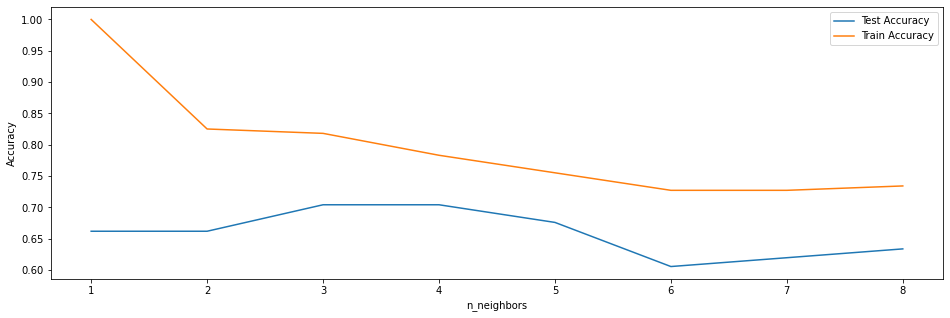

In [12]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

plt.figure(figsize=(16,5))
plt.plot(neighbors, test_accuracy, label = "Test Accuracy")
plt.plot(neighbors, train_accuracy, label = "Train Accuracy")
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show();

**Grid Search for Algorithm Tuning**

In [13]:
# giving params for grid search cv
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

#applying grid search cv
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

#printing the best params
print(round(grid.best_score_*100,2),"%")
print(grid.best_params_)

67.3 %
{'n_neighbors': 2}


**Visualizing the CV results**

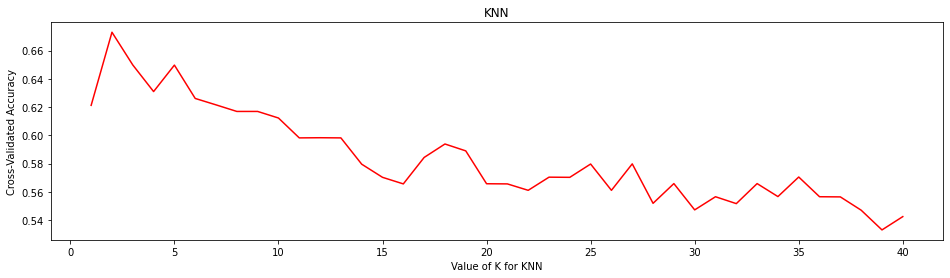

In [14]:
plt.figure(figsize=(16,4))
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores,color="red")
plt.title("KNN")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show();

**As per Grid Search CV K-value of 2 brings the highest accuracy value.**                                      
## Final Model

In [15]:
model_final = KNeighborsClassifier(n_neighbors=2)
model_final.fit(X,Y)

KNeighborsClassifier(n_neighbors=2)

In [16]:
# Predict from newly created KNN model
pred = model_final.predict(X)
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           1       0.76      1.00      0.86        70
           2       0.84      0.82      0.83        76
           3       1.00      0.35      0.52        17
           5       0.91      0.77      0.83        13
           6       0.88      0.78      0.82         9
           7       1.00      0.79      0.88        29

    accuracy                           0.83       214
   macro avg       0.90      0.75      0.79       214
weighted avg       0.85      0.83      0.82       214

